In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
df = pd.read_csv("AAPL.csv")

In [27]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [28]:
#here i am taking consideration data one day before for the columns 'Low','High','Volume','Close' and 'Adj Close'
new_df = df.copy()
new_df['y_High']= df['High'].shift(1)
new_df['y_Low']= df['Low'].shift(1)
new_df['y_Volume']= df['Volume'].shift(1)
new_df['y_Close']= df['Close'].shift(1)
new_df['y_adj_close']= df['Adj Close'].shift(1)
new_df = new_df.drop(0).reset_index(drop = True)
new_df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Adj Close      float64
Volume           int64
y_High         float64
y_Low          float64
y_Volume       float64
y_Close        float64
y_adj_close    float64
dtype: object

In [29]:
#Splitting the data into feature and target variable
x=new_df[['Open','y_High','y_Low','y_Volume','y_Close','y_adj_close']] 
#x=new_df[['Open']] 
y = new_df['Close']

#Splitting the data into train and test
xtrain = x[900:1200]
xtest = x[1200:1258].reset_index(drop = True)
ytrain = y[900:1200]
ytest = y[1200:1258].reset_index(drop = True)

In [30]:
#Linear Regression model
linear_regression_model = LinearRegression()
#Training Data
linear_regression_model.fit(xtrain,ytrain)
#Predicting data
y_pred = linear_regression_model.predict(xtest)
#Calculating mean square error
print(f"Mean square error for linear regression is {mean_squared_error(ytest,y_pred)}")
#Calculating r2 score
print(f"r2 score for Linear regression is {r2_score(ytest,y_pred)}")



Mean square error for linear regression is 2.821947446620909
r2 score for Linear regression is 0.9091908744287214


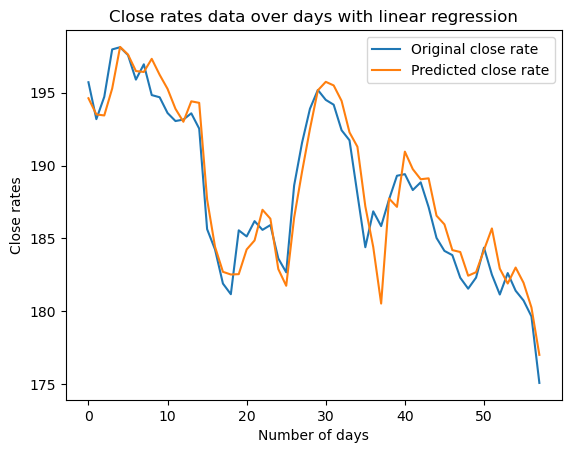

In [31]:
#Plotting train vs test close predictions from linear regression
plt.plot(ytest,label ='Original close rate')
plt.plot(y_pred,label ='Predicted close rate')
plt.xlabel('Number of days')
plt.ylabel('Close rates')
plt.title('Close rates data over days with linear regression')
plt.legend()

Polynomeal regression for stock predictions

In [32]:
# Degree of the polynomial
degree = 2

# Polynomial modeling of data
poly_features = PolynomialFeatures(degree=degree)
xtrain_poly = poly_features.fit_transform(xtrain)
xtest_poly = poly_features.transform(xtest)

# Fitting the model
polynomial_regression_model = LinearRegression()
polynomial_regression_model.fit(xtrain_poly, ytrain)

# Predict on the test data
y_pred = polynomial_regression_model.predict(xtest_poly)

# Finding Mean squared error
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error for ploynomial regression is :", mse)

# Finding r2 score 
print(f"r2 score for polynomial regression is {r2_score(ytest,y_pred)}")

Mean Squared Error for ploynomial regression is : 2.3321096637220555
r2 score for polynomial regression is 0.9249536558334859


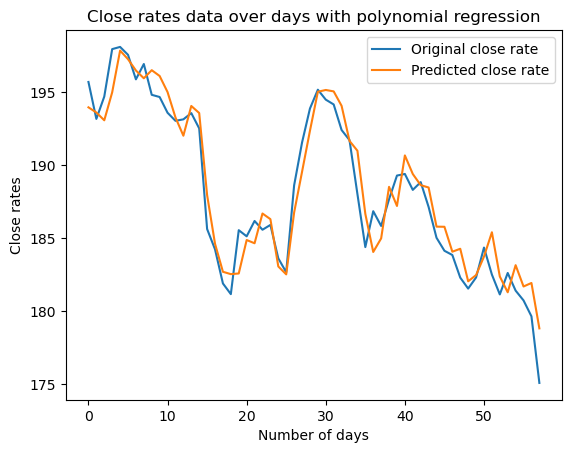

In [33]:
#Plotting train vs test close predictions from linear regression
plt.plot(ytest,label ='Original close rate')
plt.plot(y_pred,label ='Predicted close rate')
plt.xlabel('Number of days')
plt.ylabel('Close rates')
plt.title('Close rates data over days with polynomial regression')
plt.legend()

Program that simulates trading on predicted value

In [34]:
profit = 0
total = 0
amount = 100
right_predictions =0
wrong_predictions =0
total_profit = 0
total_loss = 0
x1=[]
y1=[]
starting_day = 1200
end_day = 1258
day = 1
df_copy = new_df[starting_day:end_day]
#Uncomment below code when using polynomial Regression
#model = polynomial_regression_model
#y_pred_below =model.predict(poly_features.transform(x[1000:1258]))

#Uncomment below code when using Linear Regression
model = linear_regression_model
y_pred_below =model.predict(x[starting_day:end_day])

#for i in range(0,len(df_copy)):
for i in range(starting_day,1258):
    open_value = new_df['Open'][i]
    lowest_value = new_df['Low'][i]
    highest_value = new_df['High'][i]
    predicted_close_value = y_pred_below[i-starting_day]
    actual_close_value = new_df['Close'][i]
    
    if(predicted_close_value<open_value):
        if(lowest_value<predicted_close_value):
            local_profit = open_value - predicted_close_value
            profit = profit + local_profit
            amount = amount*(1+(local_profit/open_value))
        elif(lowest_value>predicted_close_value):
            local_profit = open_value - actual_close_value
            profit =profit + local_profit
            amount = amount*(1+(local_profit/open_value))
    elif(predicted_close_value>open_value):
        if(highest_value>predicted_close_value):
            local_profit = predicted_close_value - open_value
            profit = profit +local_profit
            amount = amount*(1+(local_profit/open_value))
        elif(highest_value < predicted_close_value):
            local_profit = actual_close_value - open_value
            profit = profit+local_profit
            amount = amount*(1+(local_profit/open_value))
    if(local_profit>0):
        right_predictions = right_predictions+1
        total_profit = total_profit + local_profit 
    else:
        wrong_predictions=wrong_predictions+1
        total_loss = total_loss +local_profit
    x1.append(day)
    #x1.append(i)
    y1.append(amount)
    
    print(f"Amount on day {day} is {amount}")
    day = day+1
    
    
print(f"Right predictions are {right_predictions} and wrong predictions are {wrong_predictions}")
print(f"Total profit is {total_profit} and total loss is {total_loss}")
print(f"Ratio : {right_predictions/(wrong_predictions+right_predictions)}")

amount

Amount on day 1 is 100.21251993779592
Amount on day 2 is 100.24884159208189
Amount on day 3 is 100.43239603095574
Amount on day 4 is 100.52867702148603
Amount on day 5 is 100.5847861080286
Amount on day 6 is 100.6247750124477
Amount on day 7 is 100.8231294489126
Amount on day 8 is 100.95373206091351
Amount on day 9 is 101.16601229923226
Amount on day 10 is 101.22821654932793
Amount on day 11 is 101.26728712875295
Amount on day 12 is 101.41294656929269
Amount on day 13 is 101.6818710784877
Amount on day 14 is 101.81903675908622
Amount on day 15 is 102.0276080251152
Amount on day 16 is 102.31475308465299
Amount on day 17 is 102.43170688436435
Amount on day 18 is 102.74957938406006
Amount on day 19 is 103.05523112858617
Amount on day 20 is 103.31851983833154
Amount on day 21 is 103.50250985216175
Amount on day 22 is 103.79239932613876
Amount on day 23 is 104.03073833220121
Amount on day 24 is 104.19539383984932
Amount on day 25 is 104.62064610540315
Amount on day 26 is 104.90324061230871


103.79294478729874

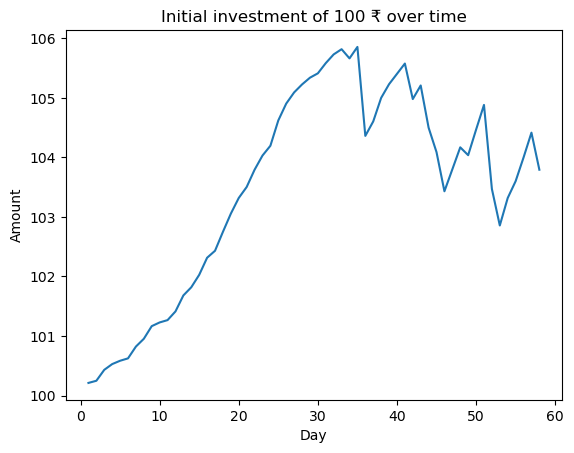

In [44]:
plt.plot(x1,y1)
plt.xlabel("Day")
plt.ylabel("Amount")
plt.title("Initial investment of 100 ₹ over time")
plt.show()


In [36]:

model.coef_

array([ 9.52046487e-01, -1.42459564e-01,  1.28133700e-01, -3.23788526e-10,
       -9.61950849e-01,  1.00506277e+00])

In [37]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,43.985001,44.000000,43.634998,43.882500,42.245636,78949600
1,2019-03-06,43.667500,43.872501,43.485001,43.630001,42.002556,83241600
2,2019-03-07,43.467499,43.610001,43.005001,43.125000,41.516384,99185600
3,2019-03-08,42.580002,43.267502,42.375000,43.227501,41.615067,95997600
4,2019-03-11,43.872501,44.779999,43.837502,44.724998,43.056709,128044000
...,...,...,...,...,...,...,...
1254,2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900
1255,2024-02-28,182.509995,183.119995,180.130005,181.419998,181.419998,48953900
1256,2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600
1257,2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000


In [38]:
linear_regression_model

LinearRegression()

In [39]:
x

,Open,y_High,y_Low,y_Volume,y_Close,y_adj_close
0,43.667500,44.000000,43.634998,78949600.0,43.882500,42.245636
1,43.467499,43.872501,43.485001,83241600.0,43.630001,42.002556
2,42.580002,43.610001,43.005001,99185600.0,43.125000,41.516384
3,43.872501,43.267502,42.375000,95997600.0,43.227501,41.615067
4,45.000000,44.779999,43.837502,128044000.0,44.724998,43.056709
...,...,...,...,...,...,...
1253,181.100006,182.759995,180.649994,40867400.0,181.160004,181.160004
1254,182.509995,183.919998,179.559998,54318900.0,182.630005,182.630005
1255,181.270004,183.119995,180.130005,48953900.0,181.419998,181.419998
1256,179.550003,182.570007,179.529999,136682600.0,180.750000,180.750000


In [40]:
test_df =pd.DataFrame([[169.15,171.24,168.68,684369000,169.12,169.12]])

test_df.rename(columns = {0:'Open',1:'y_High',2:'y_Low',3:'y_Volume',4:'y_Close',5:'y_adj_close'})

linear_regression_model.predict(test_df)

C:\Users\dixit\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([169.91532277])

###### 